# Abstract

## Resumen
Se realizará un análisis sobre datos de partidas de League of Legends (un juego online) para intentar predecir el resultado de las mismas, con la información disponible luego de transcurridos 10 minutos de juego.
## Motivación
Ya sea de forma lúdica o con un foco puesto en apuestas online, resulta interesante explorar la incidencia de variables comunmente consideradas "críticas" por la masa de jugadores al momento de predecir un resultado, y/o descubrir nuevas variables que no suelen ser tenidas en cuenta.
## Audiencia
Dirigido a entusiastas de los videojuegos de estrategia en general, y amantes del League of Legends en particular
# Contexto y Objetivos
## Contexto Comercial
League of Legends es un juego MOBA (Multiplayer Online Battle Arena), un tipo de juego de estrategia multijugador en equipos que nace en el 2003 y fue ganando amplia popularidad hasta el día de hoy. Este tipo de juegos, que comenzaron como modificaciones de otros ya existentes, fueron sorprendiendo por su profundidad bajo una aparente simpleza, ya que con el correr de los años los jugadores comenzaron a desarrollar estrategias cada vez más complejas, explotando recursos poco aparentes, y exprimiendo al máximo cada ventaja para poder ganar.
## Definición de Objetivo
Nuestro objetivo será investigar si es posible, y con qué grado de certeza, predecir el resultado de una partida luego de que hayan transcurrido solo 10 minutos de la misma (tener en cuenta que estas duran entre 35 y 50 minutos).

Buscaremos explorar los que comunmente se consideran como "principales indicadores" de ventaja, y si efectivamente tienen el peso que les atribuyen los jugadores.

## Contexto Analítico
Para responder estos interrogantes, utilizaremos un dataset etiquetado de 9879 partidas de alto nivel, con información de las mismas al minuto 10, y el resultado final. Este dataset fue construido utilizando la API de Riot (empresa dueña del LoL) y obtenido de Kaggle.

Cabe destacar que existen muchas variables más allá de las provistas en el dataset que podrían ayudar a predecir el resultado, pero en pos de mantener la simpleza y capacidad de generalizar del modelo, nos atendremos a estas.

El caso será abordado con un modelo de **Árbol de Decisión** y de **Regresión Logística**
# Investigación y Análisis

## Hipótesis a resolver
#### Es de vital interés explorar las siguientes variables y su relación con la probabilidad de victoria:  
*   La diferencia de oro a favor de un equipo al minuto 10.
*   La inversión en visión, o "Vision Score".
*   El nivel promedio del equipo al minuto 10 y la diferencia respecto a su adversario.
*   La performance del Jungler (jugador que impacta todo el mapa y controla objetivos).
*   La obtención de "First Blood" (obtener el primer asesinato de la partida vs un jugador enemigo), históricamente considerada como un punto pivotal de partidas.

# Análisis

## Imports

In [ ]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importo funcionalidades de sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Selección de Modelos
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from scipy.stats import randint

# Métricas
# ==============================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga y Preprocesamiento de datos

In [ ]:
# Cargo Dataset LoL
df = pd.read_csv('/content/drive/MyDrive/CoderHouse DS/Entrega 2/high_diamond_ranked_10min.csv')
df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
# Exploro datos sin encontrar nulos. Observo que todos los datos están seteados correctamente como numéricos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
# Seteo gameID como Index
df.set_index('gameId', inplace = True)

#### Observo el balance de observaciones en la muestra y valido que es casi 50/50

In [ ]:
# Observamos si dentro de blueWins existe algun valor distinto de 0 o 1. Notamos que no hay etiquetas anomalas, y que la muestra se encuentra bien balanceada
df.groupby('blueWins').count()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,
0,4949,4949,4949,4949,4949,4949,4949,4949,4949,4949,...,4949,4949,4949,4949,4949,4949,4949,4949,4949,4949
1,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,...,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930


In [ ]:
# Validamos que no haya superposición en la variable dicotómica First Blood (Es decir, que si blueFirstBlood = 1 => redFirstBlood = 0 y viceversa)
df.groupby(['blueFirstBlood', 'redFirstBlood']).count()

,,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueFirstBlood,redFirstBlood,,,,,,,,,,,,,,,,,,,,,
0,1,4892,4892,4892,4892,4892,4892,4892,4892,4892,4892,...,4892,4892,4892,4892,4892,4892,4892,4892,4892,4892
1,0,4987,4987,4987,4987,4987,4987,4987,4987,4987,4987,...,4987,4987,4987,4987,4987,4987,4987,4987,4987,4987


In [ ]:
# Seteo estilo de Matplotlib
plt.style.use('ggplot')

## EDA

###La primer hipótesis que vamos a explorar es si tener una ventaja en términos de oro al minuto 10 puede aumentar las chances de ganar de un equipo
####Como es esperado, en los casos donde blueWin = 1 la diferencia de oro es predominantemente positiva

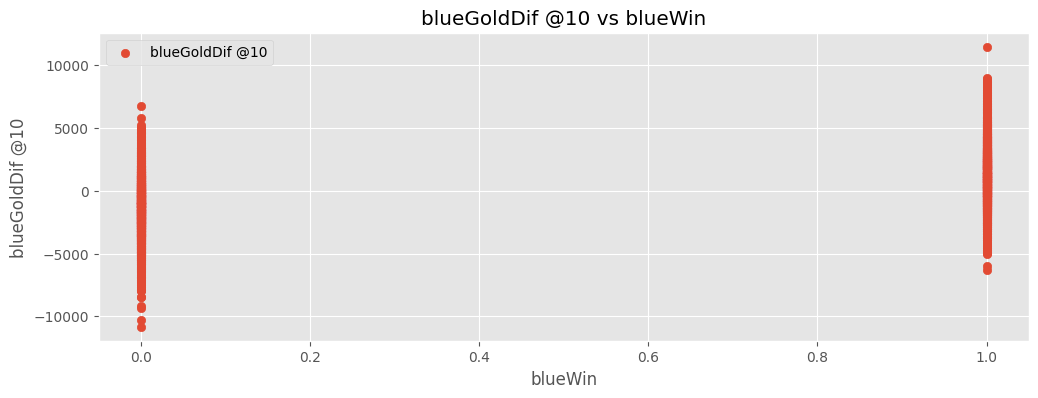

In [ ]:
# Relaciono variable objetivo blueWins con blueGoldDiff

name_x = 'blueWin'
name_y = 'blueGoldDif @10'
x = df.blueWins
y = df.blueGoldDiff

fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x, y)

ax.set_xlabel(f'{name_x}')
ax.set_ylabel(f'{name_y}')

ax.set_title(f'{name_y} vs {name_x}')

ax.legend([f'{name_y}'])

plt.show()

###Busco ver la distribución de la blueGoldDif donde blueWin = 1. Esto nos servirá para entender a partir de cuánto oro a favor el impacto de la variable se vuelve notorio.
####Hubiera esperado un sesgo hacia la derecha pero es decididamente normal, con una media y mediana >0. Esto podría indicar que una diferencia de oro a favor de >1000 en el minuto 10 es un fuerte indicador de victoria

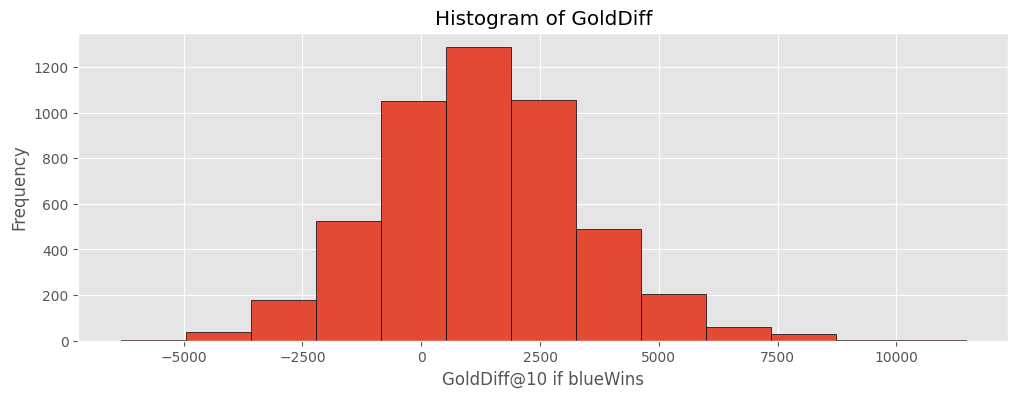

In [ ]:
#Filtro DF
df_filtered = df[(df.blueWins == 1)]

#Armo Histograma
x = df_filtered['blueGoldDiff']
num_bins = round(1 + np.log2(len(x)))

fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x, bins=num_bins, edgecolor='black')

ax.set_xlabel('GoldDiff@10 if blueWins')
ax.set_ylabel('Frequency')

ax.set_title('Histogram of GoldDiff')

plt.show()

###Otra hipótesis que en general se baraja es que tener un fuerte control de visión (blueWardsPlaced), que permite tener información acerca de la ubicación de los jugadores enemigos, mejora la capacidad de asegurar objetivos en el juego temprano, principalmente Dragones (blueDragons).
####Contrario a lo esperado, no es evidente una incidencia directa en la cantidad de visión vs la capacidad de asegurar el objetivo.

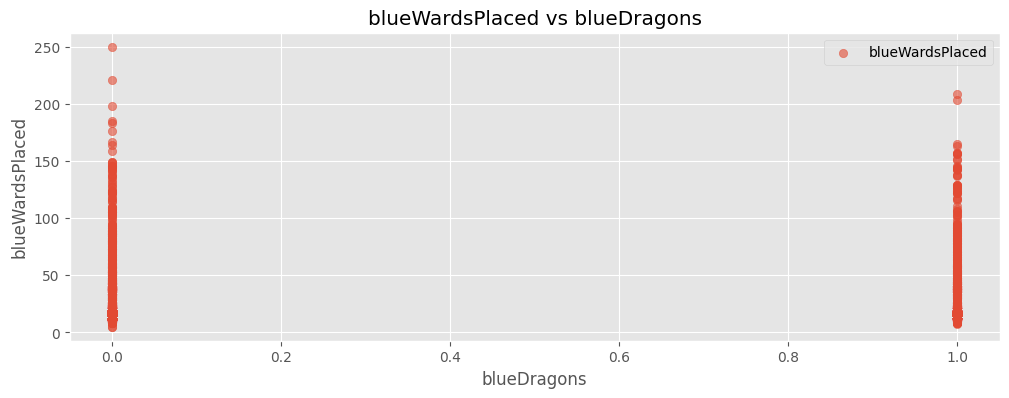

In [ ]:
# Armo Scatterplot
name_y = 'blueWardsPlaced'
name_x = 'blueDragons'
y = df.blueWardsPlaced
x = df.blueDragons

fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x, y, alpha=0.6)

ax.set_xlabel(f'{name_x}')
ax.set_ylabel(f'{name_y}')

ax.set_title(f'{name_y} vs {name_x}')

ax.legend([f'{name_y}'])

plt.show()

###La siguiente hipótesis que exploraremos es aquella que dicta que, cuando un equipo está en desventaja, debe invertir mayor oro en visión para así evitar ceder más terreno y tener mejores posibilidades de remontar una partida. Para eso evaluaremos la relación entre visión al estar en desventaja, y el resultado final.
####Se descarta el efecto de la ventaja en oro sobre la inversion en visión. No parece haber relación entre ambas variables

<Axes: xlabel='blueGoldDiff', ylabel='blueWardsPlaced'>

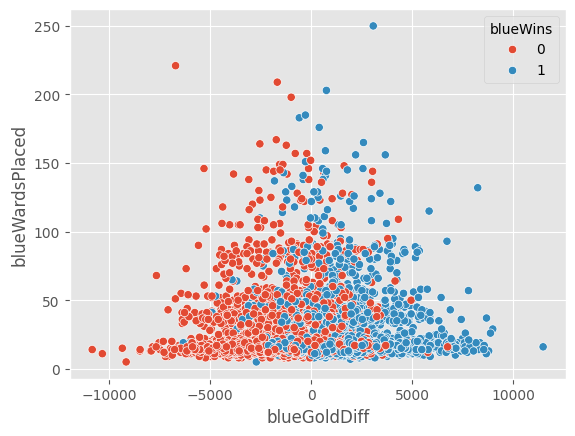

In [ ]:
sns.scatterplot(data=df, x='blueGoldDiff', y='blueWardsPlaced', hue='blueWins')

###Decididamente, uno de los principales indicadores de una ventaja pareció siempre ser el nivel promedio del equipo (suma de los niveles de cada jugador / total de jugadores). Para explorarlo miraremos un historgrama aperturado por blueWins. Así veremos también el "punto de quiebre" donde la ventaja en nivel se vuelve irremontable para el otro equipo
####Pareciera que el punto de quiebre en la ventaja que da el nivel es a partir de un AvgLevel de 7,3 en el minuto 10.

<Axes: xlabel='blueAvgLevel', ylabel='Count'>

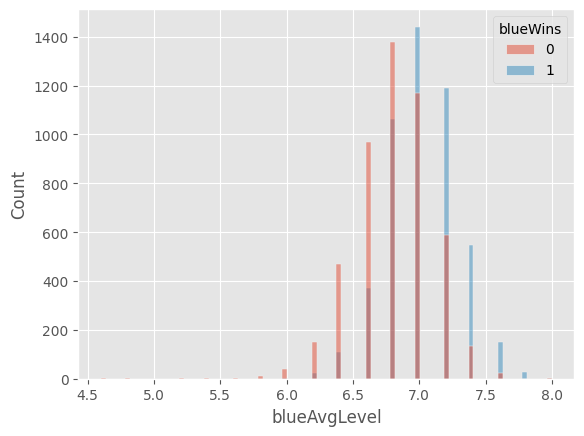

In [ ]:
sns.histplot(data=df, x='blueAvgLevel', hue='blueWins')

###Observo si este comportamiento se traduce en Diferencia de Experiencia
####Se nota claramente que +/- 1000 puntos de Experiencia de diferencia al minuto 10 pueden resultar determinantes en el resultado de la partida



<Axes: xlabel='blueExperienceDiff', ylabel='Count'>

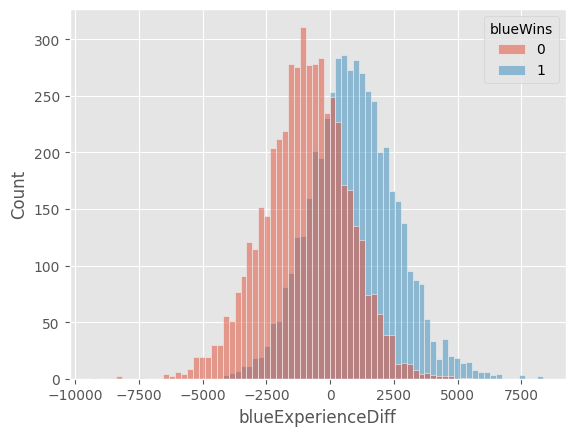

In [ ]:
sns.histplot(data=df, x='blueExperienceDiff', hue='blueWins')

###En muchos casos se asocia la performance del Jungler (una de las 5 posiciones en las que puede jugar un jugador) con el resultado de la partida, ya que este jugador tiene impacto sobre todo el mapa y es clave para asegurar objetivos. Para evaluar este impacto vamos a comparar la cantidad de "minions" matados por cada jungler (proxy del oro obetindo) en un Scatterplot y clasificarlos dependiendo de si ganó o no el equipo azul.
####No podría tomarse la performance del Jungler como un factor decisivo de victoria, o como un efecto suma cero.

<Axes: xlabel='blueTotalJungleMinionsKilled', ylabel='redTotalJungleMinionsKilled'>

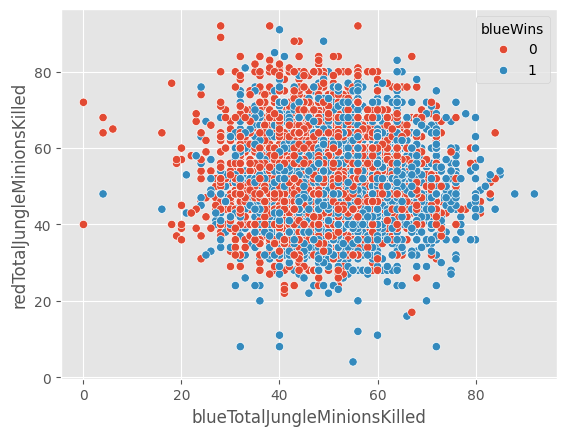

In [ ]:
sns.scatterplot(data=df, x='blueTotalJungleMinionsKilled', y='redTotalJungleMinionsKilled', hue='blueWins')

###En último lugar, vamos a observar la incidencia de obtener First Blood (osea, ser el primer equipo en obtener una kill sobre el otro), con la capacidad de dicho equipo para ponerse en ventaja (tener más oro en el min 10), y finalmente ganar la partida. Para eso creamos un boxplot donde observamos la diferencia de Oro a favor de Blue, abierto por Win y Loss, y observando si Blue obtuvo First Blood  

####Sorprendentemente, existen whiskers en cajas que implicarían que habiendo obtenido Red la first blood, y habiendo estado Blue con -5k Gold en el minuto 10, este logró remontar la partida.

####Por otro lado, no sorprende que los casos de Blue First Blood con Blue Wins tengan el box entero por arriba de 0.

####Podría decirse también que First Blood no resulta determinante en la goldDiff, ya que se ve que en los casos de blueWins = 1 con blueFirstBlood = 0, la caja está por arriba de blueWins = 0 y blueFirstBlood = 1

<Axes: xlabel='blueWins', ylabel='blueGoldDiff'>

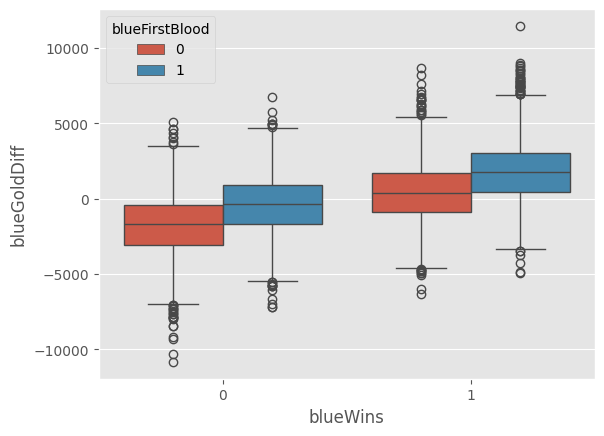

In [ ]:
sns.boxplot(data=df, x='blueWins', y='blueGoldDiff', hue='blueFirstBlood')

<Axes: xlabel='blueWins', ylabel='blueGoldDiff'>

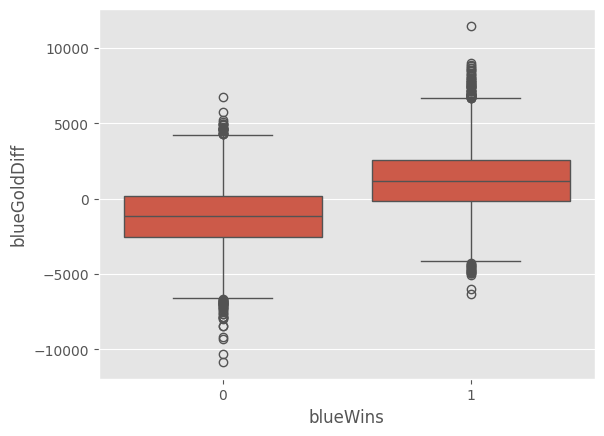

In [ ]:
sns.boxplot(data=df, x='blueWins', y='blueGoldDiff')

## Regresión Logística
El primer approach será evaluar este problema como una regresión logística, por la cantidad de features, y teniendo en cuenta que el output esperado es una probabilidad de victoria para el equipo Azul.

#### Feature Selection

Teniendo en cuenta que muchas features son la inversa de otras - blueGoldDiff es -1*redGoldDiff, por ejemlpo - vamos a eliminar todas las redundantes de red.
También generaremos posibles features auxiliares como totalGold * totalExp para blue y red, y la diferencia entre ambos.
Luego usaremos una matriz de correlación para eliminar features con baja influencia sobre el valor a predecir

In [ ]:
# Drop de features inversas
df = df.drop(columns = ['redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redGoldDiff', 'redExperienceDiff'])

In [ ]:
# Creo features adicionales
df['blueGoldExp'] = df['blueTotalGold'] * df['blueTotalExperience']
df['redGoldExp'] = df['redTotalGold'] * df['redTotalExperience']
df['blueGoldExpDiff'] = df['blueGoldExp'] - df['redGoldExp']

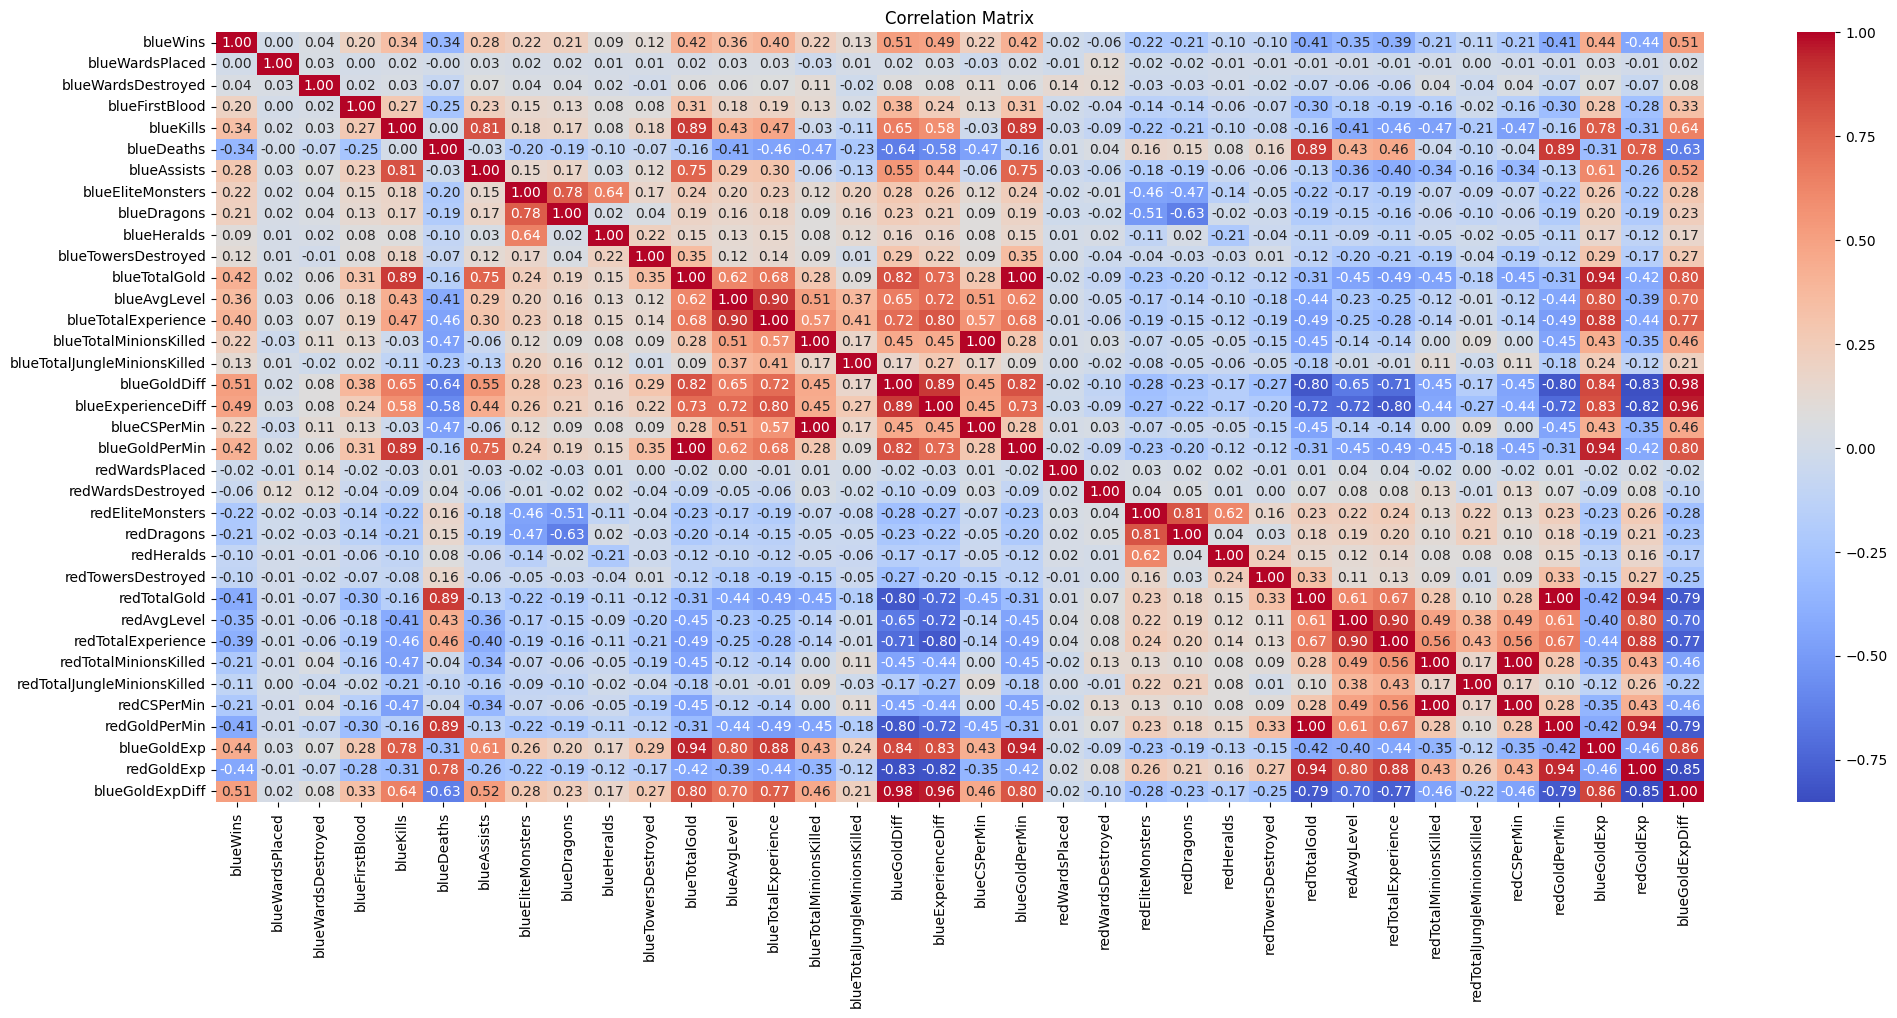

Correlation with Target Variable:
 blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redEliteMonsters               -0.221551
redDragons            

In [ ]:
# Dropeo valores no numéricos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Calculo correlaciones
correlation_matrix = numeric_df.corr()

# Construyo heatmap para visualizar la matriz
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Tomo lista de correlacion entre las features y la variable objetivo
correlation_with_target = df[numeric_columns].corrwith(df['blueWins'])
print("Correlation with Target Variable:\n", correlation_with_target)

### Compararemos modelos utilizando distintas cantidades de features

### Modelo Beta

In [ ]:
# Eliminamos features con < 0.1 corr
low_features_b = correlation_matrix['blueWins'][abs(correlation_matrix.blueWins) <= 0.1].keys()
df_beta = df.drop(columns = low_features_b)

In [ ]:
# Construyo X e y
X_beta = df_beta.drop(columns = 'blueWins')
y_beta = df_beta['blueWins']

# Divido en training y testing
X_train_beta, X_test_beta, y_train_beta, y_test_beta = train_test_split(X_beta, y_beta, test_size=0.2, random_state=1994)

In [ ]:
# Creo modelo
log_reg_beta = LogisticRegression(random_state = 1994)

# Entreno modelo
log_reg_beta.fit(X_train_beta, y_train_beta)

# Predecir los valores de prueba
y_pred_beta = log_reg_beta.predict(X_test_beta)

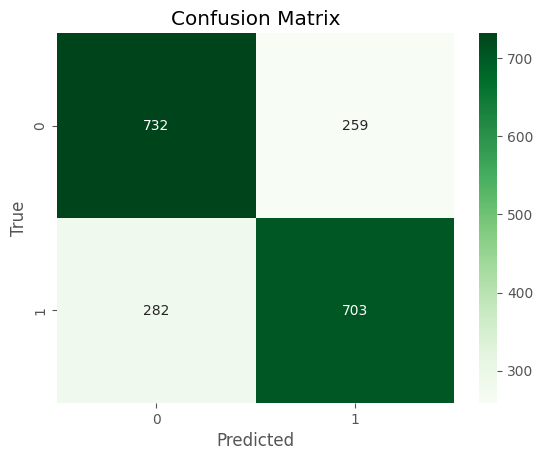

In [ ]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test_beta.round(2), y_pred=y_pred_beta.round(2))

# Armar DataFrame para mejor visualización
df_log = pd.DataFrame(cm_log, index=[0,1], columns=[0,1])

sns.heatmap(df_log, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test_beta, y_pred_beta)
precision = precision_score(y_test_beta, y_pred_beta)
recall = recall_score(y_test_beta, y_pred_beta)
f1 = f1_score(y_test_beta, y_pred_beta)
roc_auc = roc_auc_score(y_test_beta, y_pred_beta)

y_pred_beta_train = log_reg_beta.predict(X_train_beta)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train_beta, y_pred_beta_train)
precision_train = precision_score(y_train_beta, y_pred_beta_train)
recall_train = recall_score(y_train_beta, y_pred_beta_train)
f1_train = f1_score(y_train_beta, y_pred_beta_train)
roc_auc_train = roc_auc_score(y_train_beta, y_pred_beta_train)

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.7278248766291282
Precision: 0.7289433384379785
Recall: 0.7239543726235741
F1 Score: 0.7264402899656619
ROC AUC Score: 0.7278185203188614

Métricas en el conjunto de prueba:
Accuracy: 0.7262145748987854
Precision: 0.7307692307692307
Recall: 0.7137055837563452
F1 Score: 0.7221366204417051
ROC AUC Score: 0.7261767071153068


### Modelo Gamma

In [ ]:
# Eliminamos features con < 0.4 corr
low_features_g = correlation_matrix['blueWins'][abs(correlation_matrix.blueWins) <= 0.4].keys()
df_gamma = df.drop(columns = low_features_g)

In [ ]:
# Separo predictores de variable objetivo
X = df_gamma.drop(columns = 'blueWins')
y = df_gamma['blueWins']

# Divido en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994, stratify=y)


In [ ]:
# Creo modelo
log_reg_gamma = LogisticRegression(random_state = 1994)

# Entreno modelo
log_reg_gamma.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_gamma = log_reg_gamma.predict(X_test)

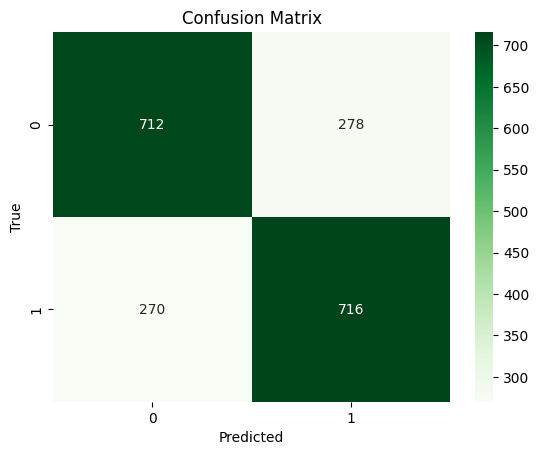

In [ ]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test.round(2), y_pred=y_pred_gamma.round(2))

# Armar DataFrame para mejor visualización
df_log = pd.DataFrame(cm_log, index=[0,1], columns=[0,1])

sns.heatmap(df_log, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_gamma)
precision = precision_score(y_test, y_pred_gamma)
recall = recall_score(y_test, y_pred_gamma)
f1 = f1_score(y_test, y_pred_gamma)
roc_auc = roc_auc_score(y_test, y_pred_gamma)

y_pred_gamma_train = log_reg_gamma.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_gamma_train)
precision_train = precision_score(y_train, y_pred_gamma_train)
recall_train = recall_score(y_train, y_pred_gamma_train)
f1_train = f1_score(y_train, y_pred_gamma_train)
roc_auc_train = roc_auc_score(y_train, y_pred_gamma_train)

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.7284575477666709
Precision: 0.7286368260427264
Recall: 0.7264198782961461
F1 Score: 0.7275266632808532
ROC AUC Score: 0.7284536875693916

Métricas en el conjunto de prueba:
Accuracy: 0.7226720647773279
Precision: 0.7203219315895373
Recall: 0.7261663286004056
F1 Score: 0.7232323232323232
ROC AUC Score: 0.7226791238961623


#### Conclusiones Preliminares

Basandonos en la Matriz de Confusión y las métricas obtenidas, podemos decir que es posible construir un modelo con una calidad de predicción decente partiendo de datos "a la vista" en el minuto 10 de una partida de LoL. Pudimos confirmar que, como es esperable, la Dif de Oro y de Experiencia de un equipo, sumado al Oro total y al Nivel promedio del mismo, son variables con un alto nivel de incidencia en el resultado de la partida. También notamos que la First Blood y la obtención de un Dragón en los primeros 10 minutos de la partida no son tan relevantes como podría llegar a creerse.

Adicionalmente, encontramos que fatures con una correlación inferior a 0.4 mejoraban sólo marginalmente algunas métricas, pero la diferencia entre la matriz producida por el modelo Beta y el modelo Gamma no resultaban contundentes

## Random Forest
#### Vamos a entrenar también un Random Forest para ver si el modelo resultante es más performante que la LogReg. Estaremos utilizando la matriz Gamma del inciso anterior, que resulta más sencilla de entender

In [ ]:
# Creamos y entrenamos el modelo RandomForestClassifier
random_forest = RandomForestClassifier(random_state=49150, n_estimators=100)
random_forest.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = random_forest.predict(X_test)

# Imprimir las métricas
print(f'Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6892712550607287


#### Intentaremos mejorar el modelo aplicando Random Search

In [ ]:
# Armar la distribucion de parametros
distribution_grid={
    'max_depth': randint(3,10),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': randint(1, 10)
}

# Instanciar el RandomSearch
random_search = RandomizedSearchCV(random_forest, param_distributions=distribution_grid, random_state=49150, n_iter=100, cv=5, scoring='accuracy')

# Ajustar el RandomSearch a los datos
random_search.fit(X_train, y_train)

In [ ]:
# Imprimir mejores parametros y score
print(f'Mejores parametros: ', random_search.best_params_)
print(f'Score: ', random_search.best_score_)

# Predecir
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Imprimir metricas
print(f'Accuracy: ', accuracy_score(y_test, y_pred))

Mejores parametros:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2}
Score:  0.7264315967301579
Accuracy:  0.722165991902834


#### Luego de utilizar Random Search, se llegó a un modelo con un Accuracy que no difiere significativamente del predicho por la Regresión Logística. Podría usarse el árbol para mejorar la explicabilidad del modelo